## **폐암 환자 생존율 (Thoracic Surgery)**
- Multiple hidden layers

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/ThoraricSurgery.csv')
df

,293,1,3.8,2.8,0,0.1,0.2,0.3,0.4,0.5,12,0.6,0.7,0.8,1.1,0.9,62,0.10
0,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
1,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
2,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
3,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0
4,18,2,2.96,1.67,0,0,0,0,0,0,12,0,0,0,1,0,61,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,98,6,3.04,2.40,2,0,0,0,1,0,11,0,0,0,1,0,76,0
465,369,6,3.88,2.72,1,0,0,0,1,0,12,0,0,0,1,0,77,0
466,406,6,5.36,3.96,1,0,0,0,1,0,12,0,0,0,0,0,62,0
467,25,8,4.32,3.20,0,0,0,0,0,0,11,0,0,0,0,0,58,1


### Creating dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1].values, df.iloc[:, -1].values,
    stratify = df.iloc[:, -1].values, random_state = 2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((351, 17), (118, 17), (351,), (118,))

### Defining model

In [9]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
                    Dense(24, input_dim = 17, activation = 'relu'),
                    Dense(10, activation = 'relu'),
                    Dense(1, activation = 'sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                432       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


### Model compiling - 실행 환경 설정

In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

모델 학습

In [13]:
history = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 30,
    batch_size = 30
)

Epoch 1/30
10/10 [==============================] - 1s 21ms/step - loss: 71.8339 - accuracy: 0.1321 - val_loss: 44.6262 - val_accuracy: 0.2958
Epoch 2/30
10/10 [==============================] - 0s 4ms/step - loss: 34.9544 - accuracy: 0.2286 - val_loss: 15.4996 - val_accuracy: 0.3521
Epoch 3/30
10/10 [==============================] - 0s 4ms/step - loss: 7.4782 - accuracy: 0.5679 - val_loss: 4.4525 - val_accuracy: 0.7887
Epoch 4/30
10/10 [==============================] - 0s 7ms/step - loss: 3.8217 - accuracy: 0.8679 - val_loss: 6.4493 - val_accuracy: 0.7887
Epoch 5/30
10/10 [==============================] - 0s 4ms/step - loss: 4.2612 - accuracy: 0.8679 - val_loss: 6.2710 - val_accuracy: 0.7887
Epoch 6/30
10/10 [==============================] - 0s 4ms/step - loss: 3.9228 - accuracy: 0.8679 - val_loss: 5.3640 - val_accuracy: 0.7887
Epoch 7/30
10/10 [==============================] - 0s 4ms/step - loss: 3.1690 - accuracy: 0.8679 - val_loss: 4.3279 - val_accuracy: 0.7887
Epoch 8/30
10/1

### Accuracy evaluation

In [14]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.8051


[0.5171453356742859, 0.805084764957428]

### Visualizing learing model

In [15]:
type(history.history)

dict

In [16]:
# training data accuracy / missing value
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[:3]

[0.13214285671710968, 0.22857142984867096, 0.5678571462631226]

In [17]:
# test data accuracy / missing value
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_loss[:3]

[44.6262321472168, 15.499563217163086, 4.452456951141357]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show>

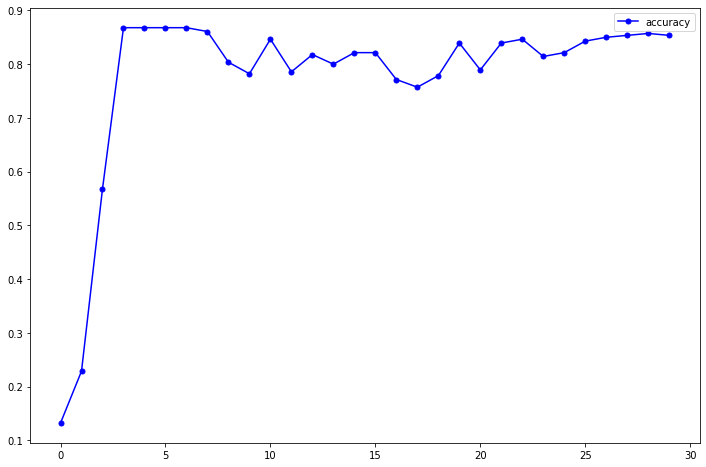

In [19]:
x_len = np.arange(len(accuracy))
plt.figure(figsize = (12, 8))
plt.plot(x_len, accuracy, 'bo-', markersize = 5, label = 'accuracy')
plt.legend()
plt.show

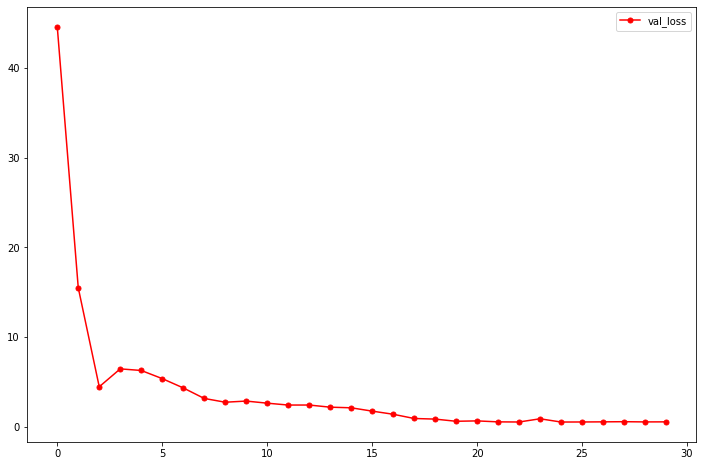

In [20]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, val_loss, 'ro-', markersize = 5, label = 'val_loss')
plt.legend()
plt.show()